Dataset loaded successfully. Displaying the first 5 rows and info:
   Unnamed: 0                                           headline  \
0           0            Stocks That Hit 52-Week Highs On Friday   
1           1         Stocks That Hit 52-Week Highs On Wednesday   
2           2                      71 Biggest Movers From Friday   
3           3       46 Stocks Moving In Friday's Mid-Day Session   
4           4  B of A Securities Maintains Neutral on Agilent...   

                                                 url          publisher  \
0  https://www.benzinga.com/news/20/06/16190091/s...  Benzinga Insights   
1  https://www.benzinga.com/news/20/06/16170189/s...  Benzinga Insights   
2  https://www.benzinga.com/news/20/05/16103463/7...         Lisa Levin   
3  https://www.benzinga.com/news/20/05/16095921/4...         Lisa Levin   
4  https://www.benzinga.com/news/20/05/16095304/b...         Vick Meyer   

                        date stock  
0  2020-06-05 10:30:54-04:00     A  

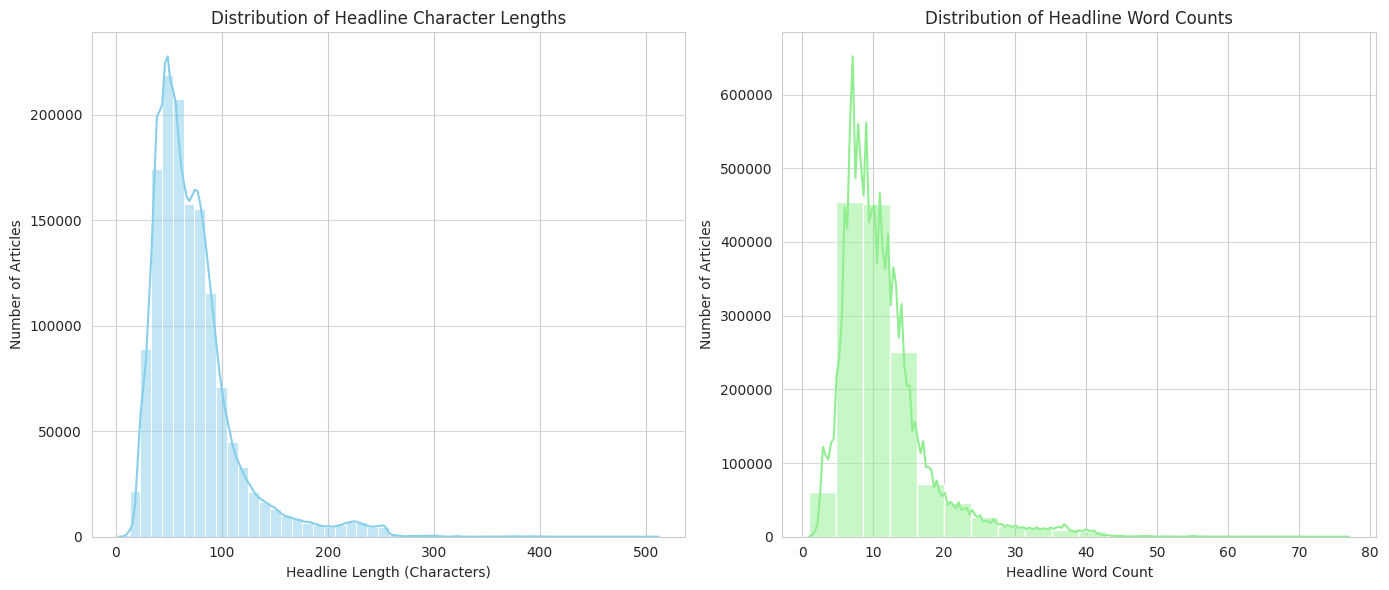

In [1]:
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

# Set plot style for better aesthetics
sns.set_style("whitegrid")

# --- Error Handling for File Loading ---
try:
    # Attempt to load the dataset from 'raw_analyst_ratings.csv'
    df = pd.read_csv('../data/raw_analyst_ratings.csv/raw_analyst_ratings.csv')
    print("Dataset loaded successfully. Displaying the first 5 rows and info:")
    print(df.head())
    print("\n")
    df.info()
except FileNotFoundError:
    # If the file isn't found, print an error message and exit the script
    print("Error: 'raw_analyst_ratings.csv' not found.")
    exit() # Terminate execution as we can't proceed without the data
except Exception as e:
    # Catch any other potential errors during file loading (e.g., corrupted CSV)
    print(f"An unexpected error occurred while loading the dataset: {e}")
    exit() # Terminate execution

print("\n--- Starting Headline Length Analysis (Character and Word Counts) ---")
# Check if 'headline' column exists before proceeding
if 'headline' in df.columns:
    # Calculate the length of each headline (number of characters)
    df['headline_char_length'] = df['headline'].apply(len)

    # Calculate the number of words in each headline
    df['headline_word_count'] = df['headline'].str.split().apply(len)

    # Get and print descriptive statistics for headline character lengths
    print("\nDescriptive Statistics for Headline Character Length:")
    print(df['headline_char_length'].describe())

    # Get and print descriptive statistics for headline word counts
    print("\nDescriptive Statistics for Headline Word Count:")
    print(df['headline_word_count'].describe())

    # --- Visualize both character and word counts in a single figure with subplots ---
    plt.figure(figsize=(14, 6)) # Adjust figure size to accommodate two plots

    # Subplot 1: Distribution of Headline Character Lengths
    plt.subplot(1, 2, 1) # 1 row, 2 columns, 1st plot
    sns.histplot(df['headline_char_length'], bins=50, kde=True, color='skyblue')
    plt.title('Distribution of Headline Character Lengths')
    plt.xlabel('Headline Length (Characters)')
    plt.ylabel('Number of Articles')
    plt.grid(axis='y', alpha=0.75)

    # Subplot 2: Distribution of Headline Word Counts
    plt.subplot(1, 2, 2) # 1 row, 2 columns, 2nd plot
    sns.histplot(df['headline_word_count'], bins=20, kde=True, color='lightgreen')
    plt.title('Distribution of Headline Word Counts')
    plt.xlabel('Headline Word Count')
    plt.ylabel('Number of Articles')
    plt.grid(axis='y', alpha=0.75)

    plt.tight_layout() # Adjust layout to prevent subplots from overlapping
    plt.show()

else:
    # If 'headline' column is missing, inform the user
    print("Warning: 'headline' column not found in the dataset. Skipping headline length analysis.")


--- Starting Publisher Analysis ---

Top 10 Most Active Publishers (Articles per Publisher):
publisher
Paul Quintaro        228373
Lisa Levin           186979
Benzinga Newsdesk    150484
Charles Gross         96732
Monica Gerson         82380
Eddie Staley          57254
Hal Lindon            49047
ETF Professor         28489
Juan Lopez            28438
Benzinga Staff        28114
Name: count, dtype: int64


/tmp/ipykernel_10246/1786667087.py:13: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.barplot(x=publisher_counts.head(10).index, y=publisher_counts.head(10).values, palette='viridis')


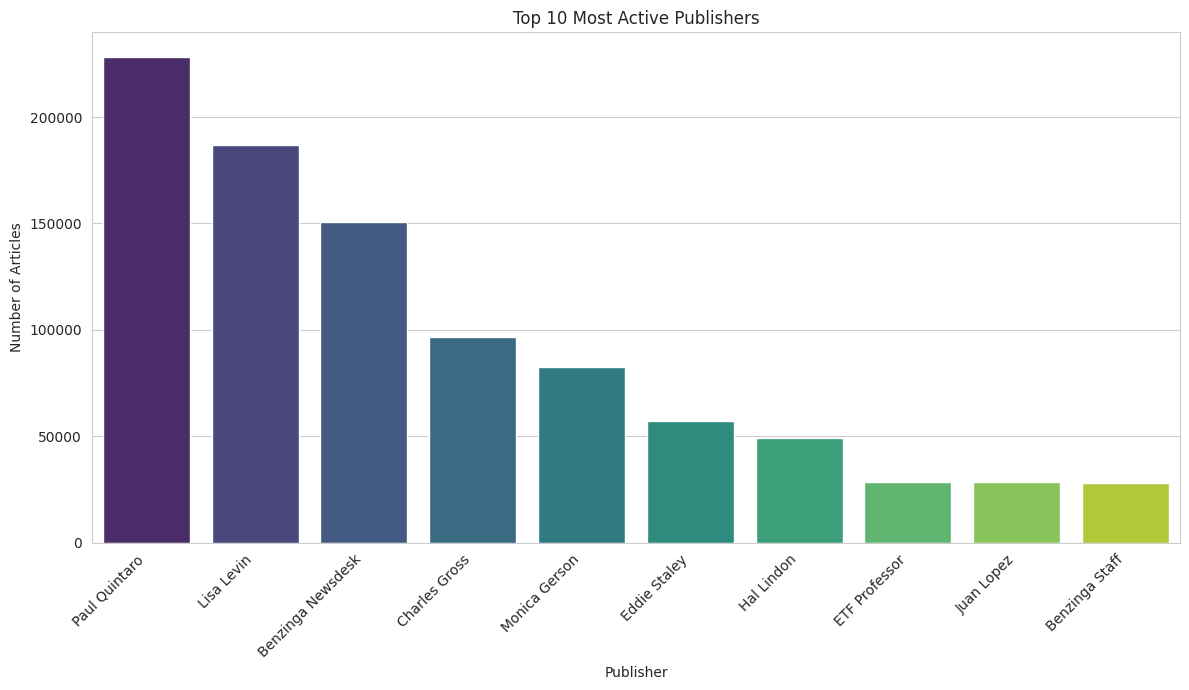

In [2]:
print("\n--- Starting Publisher Analysis ---")
if 'publisher' in df.columns:
    # Count the occurrences of each unique publisher to find the most active ones
    publisher_counts = df['publisher'].value_counts()

    print("\nTop 10 Most Active Publishers (Articles per Publisher):")
    # Display the top 10 publishers and their article counts
    print(publisher_counts.head(10))

    # --- Optional: Visualize top N publishers ---
    plt.figure(figsize=(12, 7))
    # Create a bar plot for the top 10 publishers
    sns.barplot(x=publisher_counts.head(10).index, y=publisher_counts.head(10).values, palette='viridis')
    plt.title('Top 10 Most Active Publishers')
    plt.xlabel('Publisher')
    plt.ylabel('Number of Articles')
    # Rotate x-axis labels for better readability if publisher names are long
    plt.xticks(rotation=45, ha='right')
    plt.tight_layout() # Adjust layout to prevent labels from overlapping
    plt.show()
else:
    # If 'publisher' column is missing, inform the user
    print("Warning: 'publisher' column not found in the dataset. Skipping publisher analysis.")


--- Starting Publication Date Analysis ---
Successfully converted 'date' column to datetime objects.

Articles per Day (first 10 days with data):
publication_day
2009-02-14    1
2009-04-27    2
2009-04-29    1
2009-05-22    1
2009-05-27    6
2009-05-29    2
2009-05-30    3
2009-06-01    5
2009-06-02    2
2009-06-05    6
Name: count, dtype: int64

Articles per Day (last 10 days with data):
publication_day
2020-06-02    544
2020-06-03    789
2020-06-04    538
2020-06-05    932
2020-06-06     11
2020-06-07     25
2020-06-08    765
2020-06-09    804
2020-06-10    806
2020-06-11    544
Name: count, dtype: int64


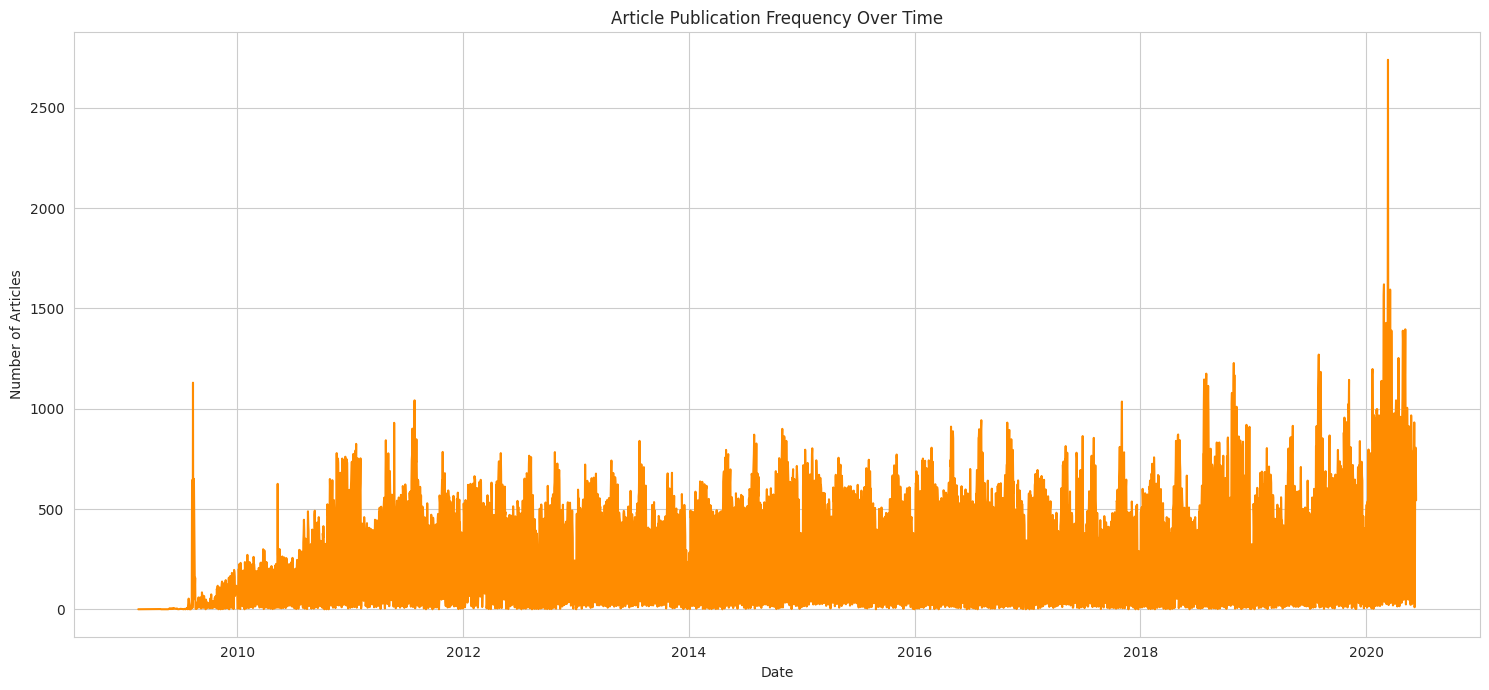


Articles by Day of the Week:
day_of_week
Monday       265164
Tuesday      296470
Wednesday    300940
Thursday     302595
Friday       217892
Saturday       7753
Sunday        16514
Name: count, dtype: int64


/tmp/ipykernel_10246/1501689420.py:38: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.barplot(x=articles_by_day_of_week.index, y=articles_by_day_of_week.values, palette='coolwarm')


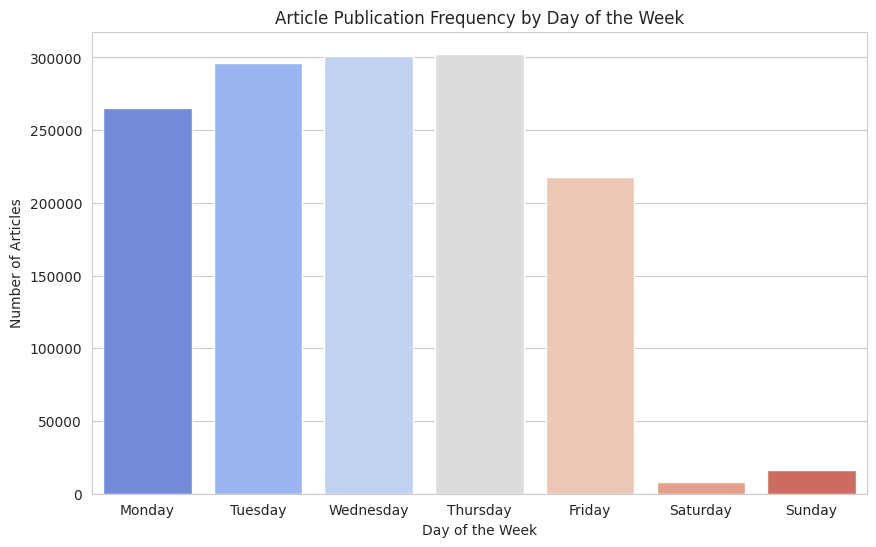


Articles by Hour of the Day (UTC-4 equivalent):
hour_of_day
0     1351408
1          14
2          57
3          93
4        1469
5        1829
6        2476
7        5033
8        5527
9        5965
10       7669
11       5701
12       5732
13       2710
14       2075
15       1612
16       3939
17       2800
18        704
19        227
20        131
21         82
22         48
23         27
Name: count, dtype: int64


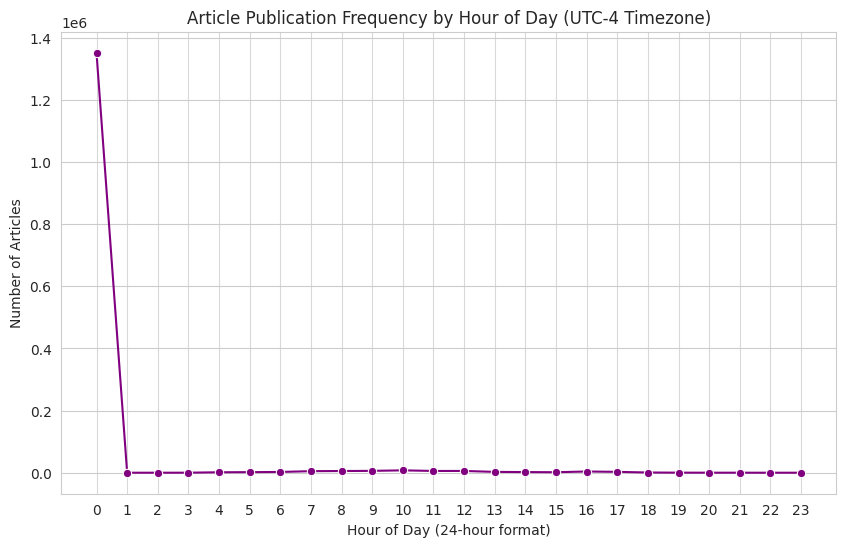

/tmp/ipykernel_10246/1501689420.py:62: UserWarning: Converting to PeriodArray/Index representation will drop timezone information.
  df['year_month'] = df['date'].dt.to_period('M') # Group by Year-Month



Articles by Month/Year (first 10 and last 10 entries):
year_month
2009-02       1
2009-04       3
2009-05      12
2009-06      40
2009-07      75
2009-08    3633
2009-09    1023
2009-10    1330
2009-11    2262
2009-12    3110
Freq: M, Name: count, dtype: int64
year_month
2019-09    12244
2019-10    16560
2019-11    14173
2019-12    11824
2020-01    16145
2020-02    18879
2020-03    24994
2020-04    20757
2020-05    17992
2020-06     6447
Freq: M, Name: count, dtype: int64


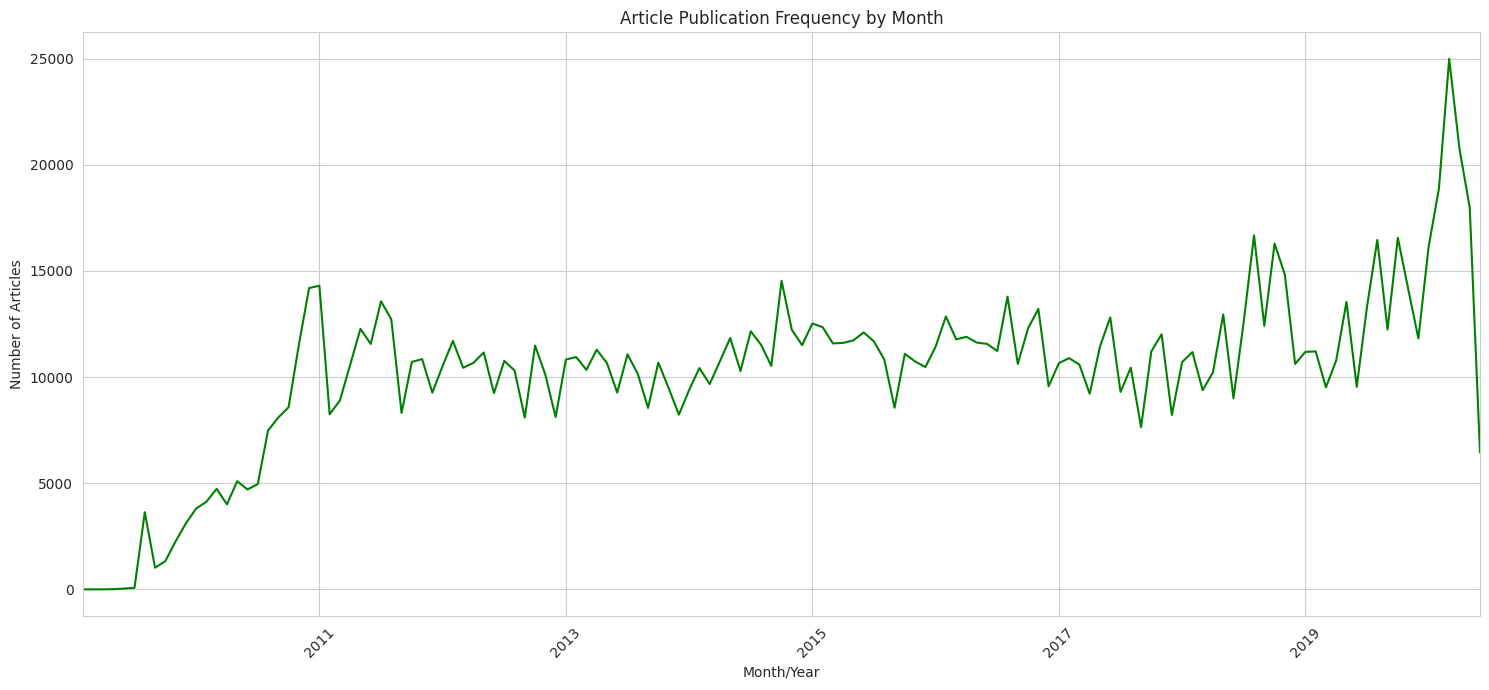

In [3]:
print("\n--- Starting Publication Date Analysis ---")
if 'date' in df.columns:
    try:
        # Convert the 'date' column to datetime objects.
        df['date'] = pd.to_datetime(df['date'], format='ISO8601')
        print("Successfully converted 'date' column to datetime objects.")

        # --- Analyze Articles per Day ---
        # Extract just the date part (yyyy-mm-dd) for daily frequency
        df['publication_day'] = df['date'].dt.date
        articles_per_day = df['publication_day'].value_counts().sort_index()

        print("\nArticles per Day (first 10 days with data):")
        print(articles_per_day.head(10))
        print("\nArticles per Day (last 10 days with data):")
        print(articles_per_day.tail(10))

        # Visualize articles per day over the entire period
        plt.figure(figsize=(15, 7))
        articles_per_day.plot(kind='line', color='darkorange')
        plt.title('Article Publication Frequency Over Time')
        plt.xlabel('Date')
        plt.ylabel('Number of Articles')
        plt.tight_layout()
        plt.show()

        # --- Analyze by Day of the Week ---
        df['day_of_week'] = df['date'].dt.day_name()
        # Order days correctly for meaningful visualization
        articles_by_day_of_week = df['day_of_week'].value_counts().reindex([
            'Monday', 'Tuesday', 'Wednesday', 'Thursday', 'Friday', 'Saturday', 'Sunday'
        ])

        print("\nArticles by Day of the Week:")
        print(articles_by_day_of_week)

        plt.figure(figsize=(10, 6))
        sns.barplot(x=articles_by_day_of_week.index, y=articles_by_day_of_week.values, palette='coolwarm')
        plt.title('Article Publication Frequency by Day of the Week')
        plt.xlabel('Day of the Week')
        plt.ylabel('Number of Articles')
        plt.show()

        # --- Analyze by Hour of the Day ---
        # Extract the hour from the datetime object (useful for intra-day patterns)
        df['hour_of_day'] = df['date'].dt.hour
        articles_by_hour = df['hour_of_day'].value_counts().sort_index()

        print("\nArticles by Hour of the Day (UTC-4 equivalent):")
        print(articles_by_hour)

        plt.figure(figsize=(10, 6))
        sns.lineplot(x=articles_by_hour.index, y=articles_by_hour.values, marker='o', color='purple')
        plt.title('Article Publication Frequency by Hour of Day (UTC-4 Timezone)')
        plt.xlabel('Hour of Day (24-hour format)')
        plt.ylabel('Number of Articles')
        plt.xticks(range(0, 24)) # Ensure all hours are displayed on the x-axis
        plt.grid(axis='x', alpha=0.75)
        plt.show()

        # --- Optional: Analyze by Month/Year for longer-term trends ---
        df['year_month'] = df['date'].dt.to_period('M') # Group by Year-Month
        articles_by_month = df['year_month'].value_counts().sort_index()

        print("\nArticles by Month/Year (first 10 and last 10 entries):")
        print(articles_by_month.head(10))
        print(articles_by_month.tail(10))

        plt.figure(figsize=(15, 7))
        articles_by_month.plot(kind='line', color='green')
        plt.title('Article Publication Frequency by Month')
        plt.xlabel('Month/Year')
        plt.ylabel('Number of Articles')
        plt.xticks(rotation=45) # Rotate labels for readability
        plt.tight_layout()
        plt.show()

    except KeyError:
        print("Error: 'date' column found but failed to convert to datetime. Check date format or column name.")
    except Exception as e:
        print(f"An unexpected error occurred during date analysis: {e}")
else:
    # If 'date' column is missing, inform the user
    print("Warning: 'date' column not found in the dataset. Skipping date analysis.")